# Support Vector Machine (SVM)

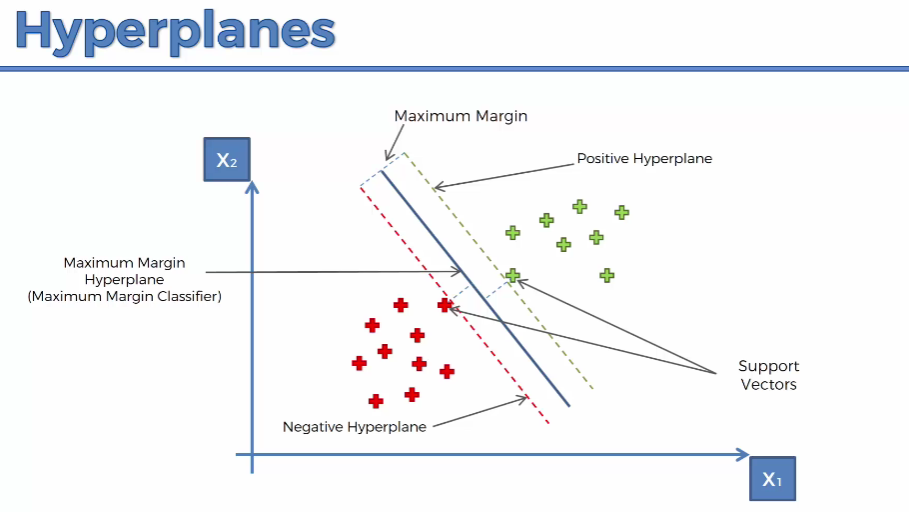

Suport Vector Machine is an algorithm that aims to find an **optimal hyperplane**(called hyperplane because it can be multiple dimension) that makes a separation into two classes. As demonstrated above, the optimal hyperplane is found by **finding the maximum margin from support vectors in each class**. However, if it is **not linearly separable, we need to use a trick.**

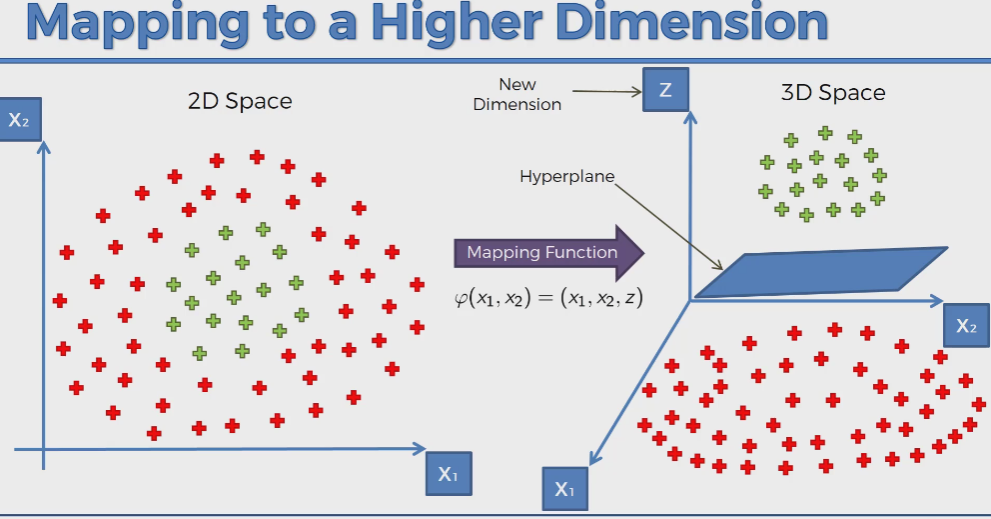

In terms of idea, we can **map into a higher dimension** following a function and then find the optimal hyperplane that separates these two classes and then project it back to 2 dimension. This is working but it is **compute-intensive**; thus, to deal with this, we need to use a trick called **'Kernel Trick'**. Instead of mapping and projection, we can use certain **kernel function** to achieve the similar ideas.

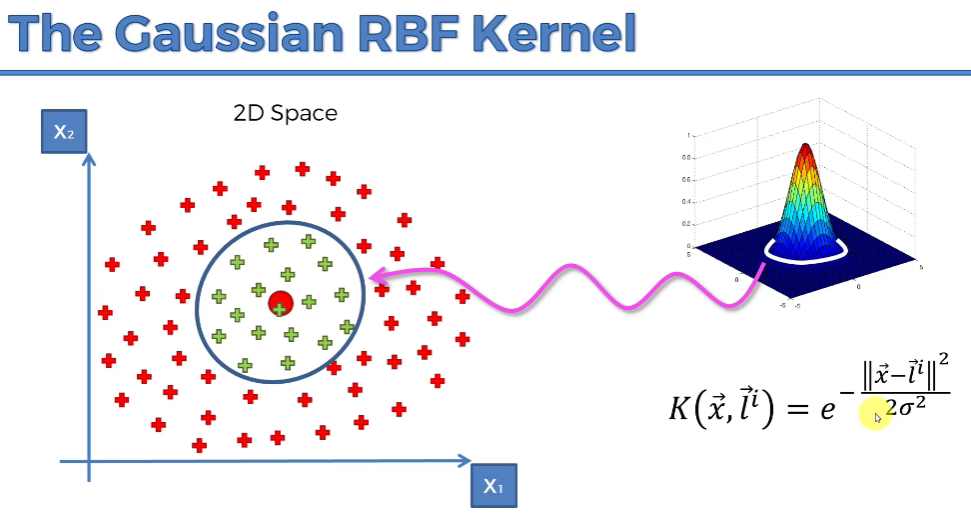

For instance, the **RBF kernel** denoted above. It works by distinguishing two classes by calculating the distance between the **data point** (indicated by $x$) and the **landmark** (indicated by $l$ and **carefully chosen**), then by the predefined value of $σ$, we could interpret the data point in terms of 3 dimension by having the result value of kernal function greater than 0 as one class and value less than or equal to 0 as another class (this is just one example, could be other boundaries). **In this case, we are not actually doing mapping and projection; intead, it is monitering this process and then separate them by a certain criteria.** For RBF, greater value of $σ$, the larger area from the landmark. **(Note: kernel could be combined together to form a more complex boundary.)**

***There are many different types of kernel, such as 'linear' and 'polynomial'. With more advanced kernel, the better the prediction, the more time to train the model.***

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

0.93

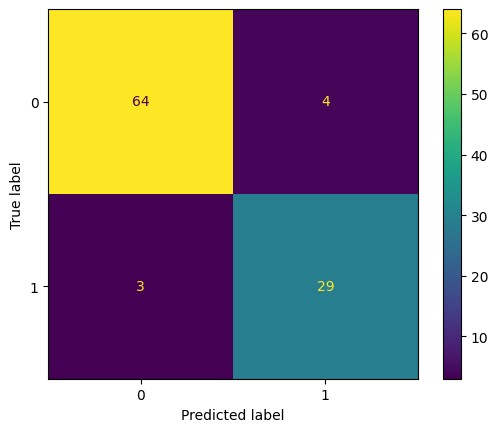

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
accuracy_score(y_test, y_pred)

## Visualising the Training set results

<ipython-input-11-115134ce2df3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


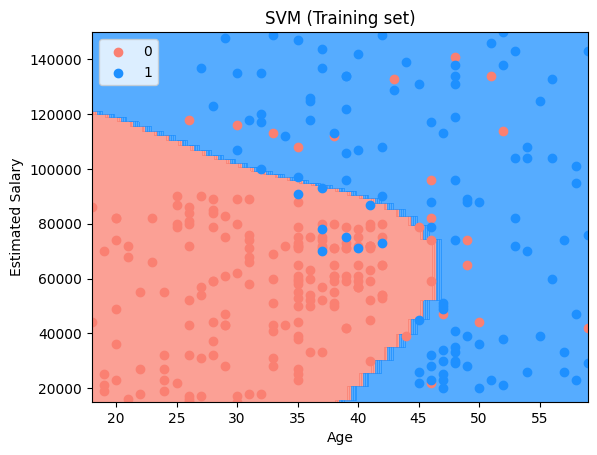

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-12-0eff60b0a380>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


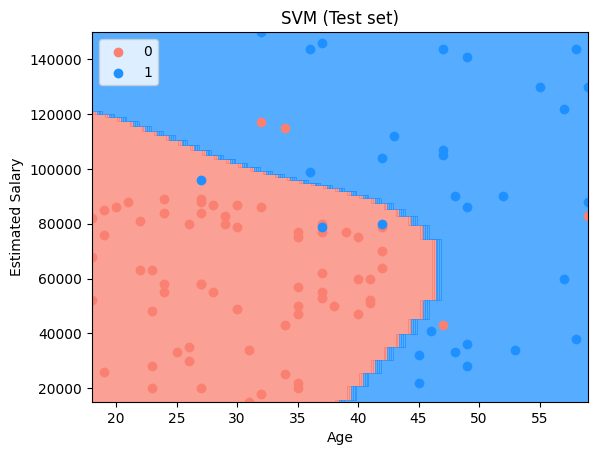

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()